### Linear regression method is applied on quantitative problems.

In [61]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')


df=df.drop('Region', axis=1)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [3]:

# Create arrays for features and target variable
y = df['life']
X = df['fertility']

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = np.array(y).reshape(-1, 1)
X = np.array(X).reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


# Regression mechanics

* y = ax + b
    * y = target
    * x = single feature
    * a, b = parameters of model
* How do we choose `a` and `b` ?
* Define an error function for any given line
    * Choose the line that minimize the error function

In [27]:
X_fertility = np.array(df["fertility"]).reshape(-1,1)


0.6192442167740035


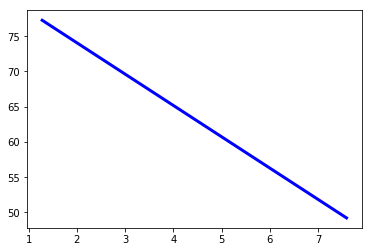

In [26]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Import matplotlib as plt
import matplotlib.pyplot as plt

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)
# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='blue', linewidth=3)
plt.show()


# Train/test split for regression
<h4>train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.</h4>

In [6]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


## Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. 

# Cross-Validation motivation
* Model performance is dependent on way the data is split
* Not representative of the model's ability to generalize
* Solution: Cross-validation！


    Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.



In [7]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


# Regularization I: Lasso


In [83]:
df_columns = df.columns
df_columns
X = df.drop('life', axis=1)
y = df["life"].values
X.shape

(139, 8)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


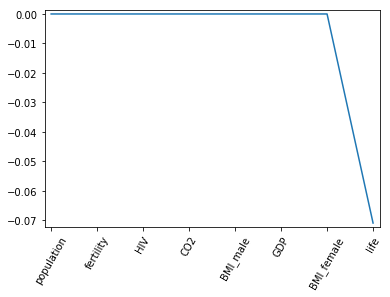

In [85]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)-1), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


# Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, `Ridge regression` should be your first choice.

> Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as `L1` regularization because the regularization term is the `L1` norm of the coefficients. This is not the only way to regularize, however.

> If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the `L2` norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated `R2` scores for each, using this function that we have defined for you, which plots the `R2` score as well as standard error for each alpha:



In [87]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

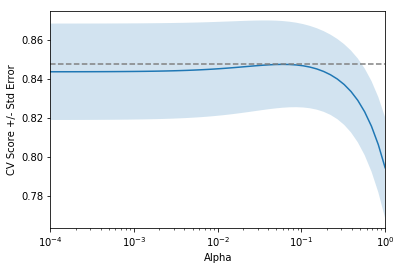

In [88]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
